In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'../data_sets/final_results.csv')

In [3]:
df['wins']=df['team_record'].apply(lambda v : int(v[0:v.index('-')]))

In [4]:
df_qb = df[df['position']=='QB'].copy()
df_qb

,Unnamed: 0,index,playerName,totalCash,team,salary,year,position,team_record,wins
42,42,50,Kyle Sloter,3000,DEN,-,2017,QB,6-11-0,6
43,43,51,Kyle Sloter,20000,MIN,20000,2017,QB,14-3-0,14
44,44,52,Kyle Sloter,437647,MIN,437647,2017,QB,14-3-0,14
129,129,144,Nathan Peterman,704499,BUF,465000,2017,QB,9-8-0,9
130,130,145,Nathan Peterman,555000,BUF,555000,2018,QB,5-9-0,5
...,...,...,...,...,...,...,...,...,...,...
2416,2416,2808,Matt Schaub,8000000,OAK,4500000,2014,QB,3-13-0,3
2417,2417,2809,Matt Schaub,2000000,BAL,1000000,2015,QB,5-9-1,5
2418,2418,2810,Matt Schaub,1750000,ATL,1250000,2016,QB,11-5-0,11
2419,2419,2811,Matt Schaub,4750000,ATL,2250000,2017,QB,11-6-0,11


In [5]:
#Scale the QB salary down to millions
df_qb['totalCash']= df_qb['totalCash'].apply(lambda v:  int(v/1000000)) 

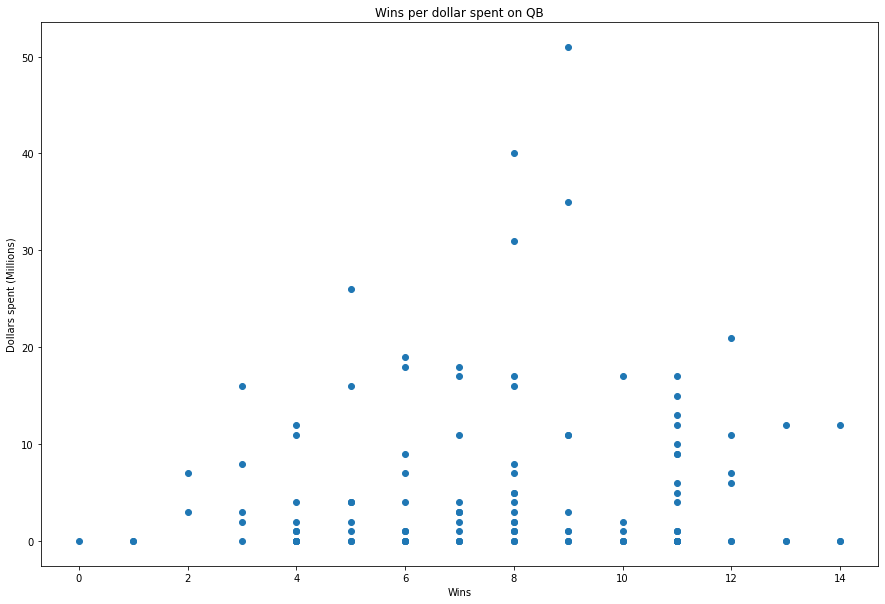

In [6]:
#Could potentially drop all 0 dollar qbs
#EDA feature #1 wins correlated with money spent on quaterbacks
df_qb.sort_values(by=['wins'] ,inplace=True)
plt.figure(figsize=(15,10))
plt.ylabel("Dollars spent (Millions)")
plt.title("Wins per dollar spent on QB")
plt.xlabel("Wins")
plt.scatter(df_qb['wins'],df_qb['totalCash'])


In [7]:
df_2017 = df[df['year'] == 2017].copy()

In [8]:
rb_df = df_2017[df_2017['position'] == 'RB']

In [9]:
rb_df = rb_df.groupby('team').sum()


In [10]:
rb_df.reset_index(inplace=True)

In [11]:
rb_df

,team,Unnamed: 0,index,totalCash,year,wins
0,ARI,2157,2509,690000,2017,9
1,ATL,1122,1292,16297000,2017,11
2,BAL,10042,11670,14062435,10085,45
3,BUF,2657,3066,5275000,4034,18
4,CAR,1719,1992,1350000,2017,11
5,CHI,3736,4301,1860000,6051,15
6,CIN,208,231,1087500,2017,7
7,CLE,837,959,2746000,2017,0
8,DAL,1985,2303,1025186,2017,9
9,DEN,3234,3750,4484375,4034,12


In [12]:
#Scale the dataset down to millions of dollars
rb_df['totalCash']= rb_df['totalCash'].apply(lambda v:  v/1000000)

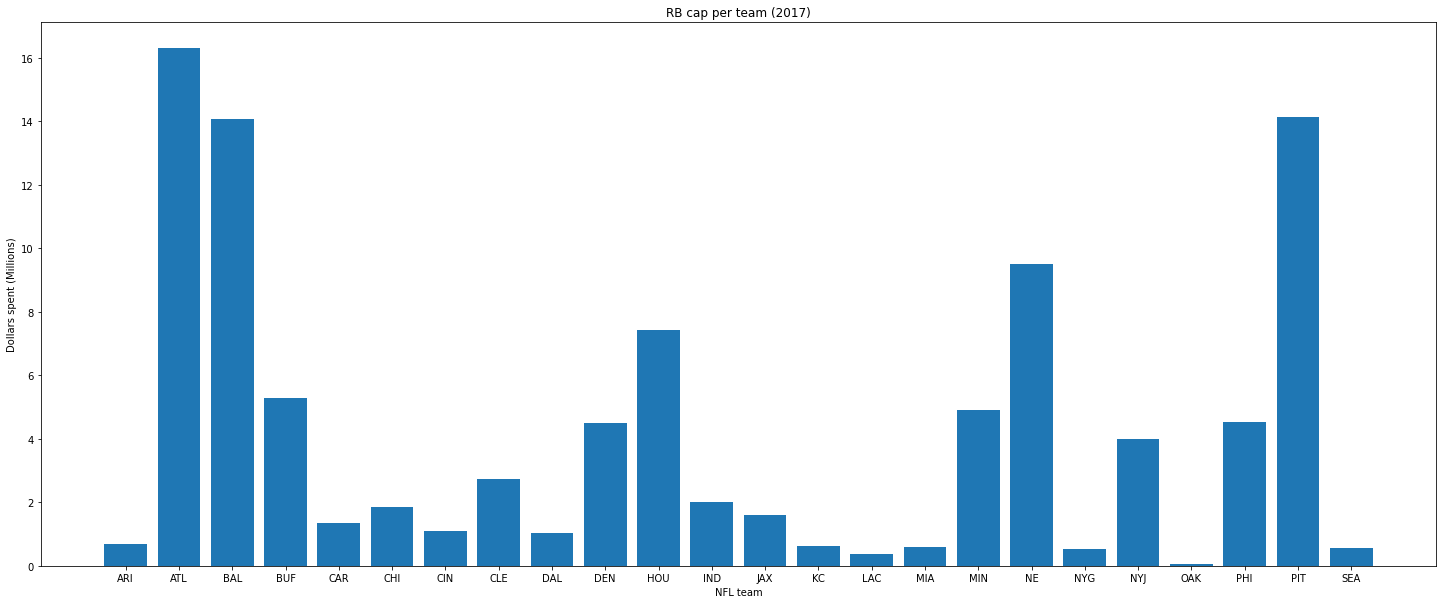

In [13]:
#EDA feature #2 adapted from Data Science from scratch
#Purpose is to understand the differences in teams spending on the running back position
#Data Science from scratch section 3 Titled Bar charts
from matplotlib import pyplot as plt
plt.figure(figsize=(25,10))
plt.bar([i + 0.1 for i, _ in enumerate(rb_df['team'])], rb_df['totalCash'])
plt.ylabel("Dollars spent (Millions)")
plt.title("RB cap per team (2017)")
plt.xlabel("NFL team")
# label x-axis with movie names at bar centers

plt.xticks([i + 0.1 for i, _ in enumerate(rb_df['team'])],rb_df['team']) 
plt.show()

In [14]:
#EDA Feature #3
#Number of entries per year

In [15]:
df['entries'] = df['wins'].apply(lambda v : 1)
df

,Unnamed: 0,index,playerName,totalCash,team,salary,year,position,team_record,wins,entries
0,0,0,Jeremy Clark,496413,NYJ,348000,2017,DT,6-11-0,6,1
1,1,1,Jeremy Clark,555000,NYJ,555000,2018,DT,4-10-0,4,1
2,2,4,Darius Jennings,51176,CLE,51176,2015,WR,3-12-0,3,1
3,3,5,Darius Jennings,79200,CLE,79200,2015,WR,3-12-0,3,1
4,4,6,Darius Jennings,51176,CLE,51176,2015,WR,3-12-0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
2523,2523,2933,Justin Hardee,410294,NO,410294,2017,WR,11-6-0,11,1
2524,2524,2934,DeVante Parker,6605213,MIA,435000,2015,WR,4-10-1,4,1
2525,2525,2935,DeVante Parker,929389,MIA,929389,2016,WR,11-5-0,11,1
2526,2526,2936,DeVante Parker,1423776,MIA,1423776,2017,WR,6-11-0,6,1


In [16]:
df_entries = df.groupby('year').sum()

In [17]:
#This Eda suggests we should consider dropping entries from all years except 2016 and 2017
df_entries.drop(columns=['Unnamed: 0','totalCash','index','wins'],inplace=True)
df_entries

,entries
year,
2009,49
2010,75
2011,106
2012,144
2013,202
2014,276
2015,390
2016,479
2017,522


In [18]:
#EDA #4 exploring what positions are most accounted for in our dataset
#This EDA operation suggests that not many teams employ fullbacks. These may skew our dataset
#One solution I propose is classifying fullbacks(FB) as running backs so that this problem is eliminated
df_wr = df.groupby('position').sum()

In [19]:
df_wr.drop(columns=['Unnamed: 0','totalCash','index','wins','year'],inplace=True)
df_wr.sort_values(by=['entries'])

,entries
position,
FB,17
DL,29
OL,34
LS,34
OLB,37
K,43
P,53
C,90
OG,115


In [20]:
#5 EDA of the 10 highest payed players in the year 2017
df_2017
df_2017.drop(columns=['Unnamed: 0'],inplace=True)
df_2017


,index,playerName,totalCash,team,salary,year,position,team_record,wins
0,0,Jeremy Clark,496413,NYJ,348000,2017,DT,6-11-0,6
8,10,Darius Jennings,476475,TEN,476475,2017,WR,10-7-0,10
9,11,Darius Jennings,14400,TEN,14400,2017,WR,10-7-0,10
16,18,Bradley McDougald,2000000,SEA,800000,2017,S,10-7-0,10
17,19,Andrew Jelks,465000,NE,465000,2017,OT,14-3-0,14
...,...,...,...,...,...,...,...,...,...
2519,2928,Chris Maragos,1250000,PHI,1250000,2017,S,14-3-0,14
2521,2931,Justin Hardee,8000,HOU,6000,2017,WR,4-13-0,4
2522,2932,Justin Hardee,14400,NO,14400,2017,WR,11-6-0,11
2523,2933,Justin Hardee,410294,NO,410294,2017,WR,11-6-0,11


In [21]:
df_2017.sort_values(by=['totalCash'], inplace=True)
df_2017['totalCash']= df_2017['totalCash'].apply(lambda v:  v/1000000)
df_2017.tail(10)
#This suggests that matthew stafford is an outlier making over 51Million in a single year while 
#the next highest paid player only made 24 million

,index,playerName,totalCash,team,salary,year,position,team_record,wins
2083,2420,Desmond Trufant,16.526000,ATL,1526000,2017,DB,11-6-0,11
576,644,Trumaine Johnson,16.742400,LA,16742400,2017,WR,11-6-0,11
2158,2510,Corey Davis,17.073864,TEN,465000,2017,OG,10-7-0,10
279,313,Ryan Tannehill,18.000000,MIA,17975000,2017,QB,6-11-0,6
1214,1397,Kevin Zeitler,18.000000,CLE,6000000,2017,OG,0-17-0,0
1108,1273,Solomon Thomas,19.080903,SF,465000,2017,DE,6-11-0,6
1937,2246,Ndamukong Suh,20.000000,MIA,9985000,2017,DT,6-11-0,6
2091,2432,Cam Newton,23.666666,CAR,13166666,2017,S,11-5-1,11
923,1055,DeAndre Hopkins,24.000000,HOU,8000000,2017,WR,4-13-0,4
1780,2064,Matthew Stafford,51.000000,DET,1000000,2017,QB,9-8-0,9
